Eduardo Avendaño
#S&P 500

El índice S&P 500 es ampliamente reconocido como uno de los indicadores más importantes del desempeño del mercado de valores de Estados Unidos, abarcando 500 de las empresas más grandes del país. Este índice no solo refleja las fluctuaciones económicas y empresariales de Estados Unidos sino que también sirve como un barómetro para la economía global. Dada su relevancia, el análisis preciso de su comportamiento es crucial para los inversores y analistas financieros. En este informe, nos centramos en modelar las fluctuaciones del índice S&P 500 utilizando el modelo estadístico ARIMA y enfocandose en el estudio del precio de cierre del índice. Utilizando datos históricos proporcionados por Yahoo Finance desde el 1 de enero de 2020 hasta la fecha actual, este estudio busca aplicar técnicas de series temporales para predecir el precio de cierre del índice.

#Instalación e importación de librerías


In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#Descripción del conjunto de datos

El conjunto de datos utilizado para este análisis consiste en las cotizaciones diarias del índice S&P 500, extraído de Yahoo Finance, cubriendo el período desde el 1 de enero de 2020 hasta la actualidad. Este dataset incluye varias métricas importantes como los precios de apertura, máximo, mínimo y cierre, así como el volumen de acciones negociadas cada día. Para nuestro análisis, nos centraremos especialmente en la variable del precio de cierre, ya que proporciona una perspectiva valiosa sobre el valor final del mercado cada día y es comúnmente utilizada como la referencia principal para evaluar el desempeño del mercado en estudios financieros.Los datos históricos del índice S&P 500 fueron extraídos de Yahoo Finance usando la librería "yfinance".

In [70]:
# Definir el ticker del S&P 500
ticker = "^GSPC"

# Descargar datos históricos
data = yf.download(ticker, start="2020-01-01", end="2024-12-01")

#Establecer nuestra serie de tiempo como los valores de cierre del conjunto de datos
ts = data["Close"]

[*********************100%%**********************]  1 of 1 completed


Cada columna tiene 1080 entradas sin valores nulos, nos importa especialmente la columna de valores de cierre.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2020-01-02 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1080 non-null   float64
 1   High       1080 non-null   float64
 2   Low        1080 non-null   float64
 3   Close      1080 non-null   float64
 4   Adj Close  1080 non-null   float64
 5   Volume     1080 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.1 KB


#Gráfica de los valores de cierre a través de los años

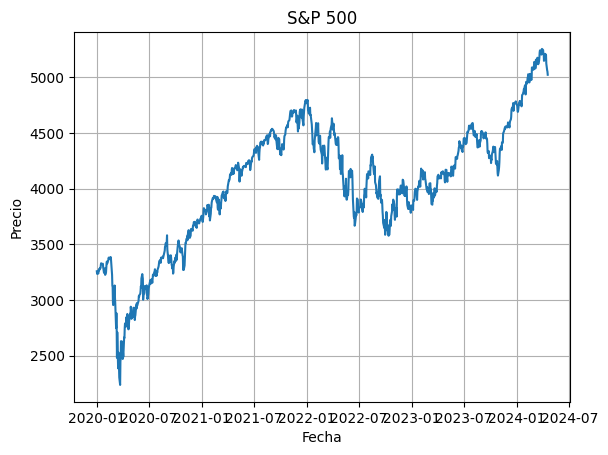

In [5]:
plt.plot(ts)
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid(True)
plt.title("S&P 500")
plt.show()

La tendencia observada en la serie temporal del índice S&P 500 refleja diversas fluctuaciones significativas, las cuales pueden atribuirse en gran medida a eventos externos de considerable impacto.
Los residuos de la serie temporal, aunque se distribuyen alrededor del cero, muestran una varianza que no es constante, indicando la presencia de heteroscedasticidad.

<Figure size 1000x600 with 0 Axes>

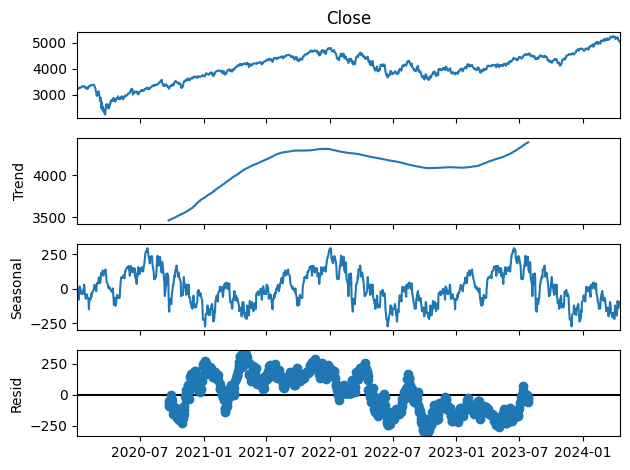

In [6]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

#Prueba adfuller de estacionariedad

In [7]:
result = adfuller(ts)


print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación básica
if result[1] < 0.05:
    print("La serie parece ser estacionaria.")
else:
    print("La serie parece no ser estacionaria.")

ADF Statistic: -1.2002103691449377
p-value: 0.673505209891168
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
La serie parece no ser estacionaria.


El valor p obtenido en la prueba de Dickey-Fuller aumentada es de 0.6735. Este resultado es significativo porque indica que no podemos rechazar la hipótesis nula de que la serie contiene una raíz unitaria, lo que sugiere que la serie no es estacionaria. Se procede a diferenciar la serie en busca de estacionariedad.

#Diferenciación de la serie


In [8]:
diff = ts.diff().dropna() #diferencia la serie y elimina valores nulos
result2 = adfuller(diff)

print('ADF Statistic:', result2[0])
print('p-value:', result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación básica
if result2[1] < 0.05:
    print("La serie diferenciada parece ser estacionaria.")
else:
    print("La serie diferenciada parece no ser estacionaria.")

ADF Statistic: -9.979959966227295
p-value: 2.1276516479421868e-17
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
La serie diferenciada parece ser estacionaria.


La serie diferenciada parece ser estacionaria ya que su valor p es bastante menor 0.05

#ACF y PACF

La ACF mide la correlación total entre diferentes lags de la serie, ayudando a detectar la presencia de dependencias que pueden ser modeladas mediante términos de medias móviles (MA). Por otro lado, la PACF mide la correlación entre observaciones en diferentes lags, controlando por las correlaciones de todos los lags más cortos, lo que es útil para identificar el número de términos autorregresivos (AR) necesarios en el modelo, sin embargo, los parámetros p y q del modelo ARIMA serán dados por la función de auto-arima

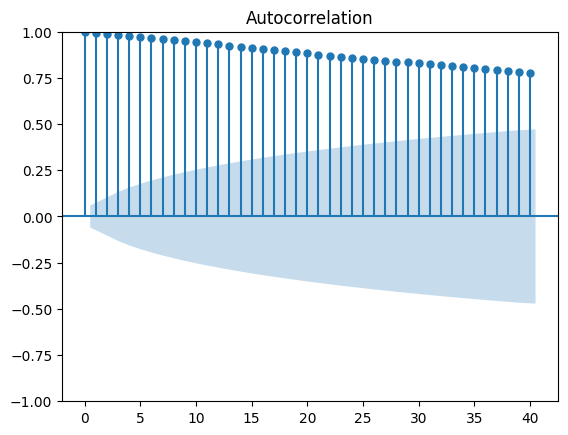

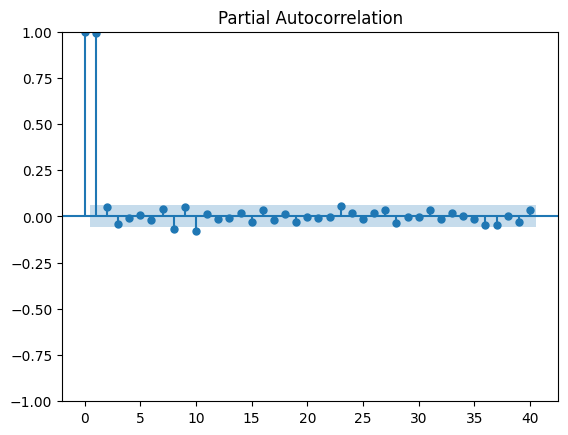

<Figure size 1000x400 with 0 Axes>

In [9]:
plot_acf(ts, lags=40)
plot_pacf(ts, lags=40)
plt.figure(figsize=(10,4))
plt.show()

La gráfica de la Función de Autocorrelación (ACF) revela que cada retardo (lag) exhibe una relación significativa con sus valores anteriores, indicando una persistencia notable en la influencia temporal a lo largo de la serie. Esto contrasta con las observaciones derivadas de la gráfica de la Función de Autocorrelación Parcial (PACF), donde las relaciones entre los retardos y la serie se vuelven insignificantes más rápidamente. Este comportamiento sugiere que, mientras el ACF capta una dependencia extendida que incluye efectos acumulativos de retardos anteriores, el PACF muestra una relación directa y más inmediata que desaparece después de los primeros retardos.

#Modelo ARIMA

Para determinar el modelo ARIMA más adecuado para analizar la serie temporal del índice S&P 500, se utilizó la función auto_arima de la biblioteca pmdarima, una herramienta ampliamente reconocida por su capacidad para optimizar la selección de parámetros de modelos ARIMA de manera automática y eficiente. Tras evaluar diversas combinaciones de parámetros, auto_arima identificó que un modelo ARIMA(2,1,0) es el más apropiado para nuestros datos.

Este modelo incluye dos términos autorregresivos y una diferenciación, pero no incorpora términos de media móvil. La elección de una diferenciación simple (d=1) se justifica por análisis previos, donde se confirmó que la serie diferenciada alcanza la estacionariedad. Esta propiedad es crucial, ya que la estacionariedad de la serie es un requisito fundamental para la aplicación efectiva de modelos ARIMA.

In [10]:
from pmdarima import auto_arima

# Ajustando el modelo. Asegúrate de que 'ts' es tu serie temporal.
model = auto_arima(ts, start_p=0, start_q=0,
                   max_p=3, max_q=3,
                   m=1,  # Ajusta este valor si conoces la periodicidad estacional de tus datos
                   seasonal=False,  # Cambia a True si tus datos son estacionales
                   trace=True,  # Mostrará información del proceso de ajuste
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Mostrando el resumen del modelo
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11469.858, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11458.949, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11460.285, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11469.053, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11457.758, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11459.530, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11459.677, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11458.489, Time=1.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11460.870, Time=4.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11457.092, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11458.445, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=11458.905, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11459.023, Time=1.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11457.921, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0

#Diagnóstico del modelo

*  Coeficientes: Los coeficientes del modelo son significativos, con el primer lag autorregresivo (ar.L1) de -0.1017 y el segundo lag (ar.L2) de 0.0557, ambos estadísticamente significativos a niveles convencionales (P<0.05), lo que implica que ambos contribuyen de manera importante a la modelización de la serie temporal.

*  Prueba Ljung-Box: La prueba de Ljung-Box para autocorrelación en los residuos muestra un p-valor de 0.99, lo que indica que no hay autocorrelación significativa en los residuos y que el modelo captura adecuadamente la autocorrelación en los datos.

*  Jarque-Bera: El resultado de la prueba Jarque-Bera fue significativo, lo que indica que los residuos no siguen una distribución normal. Esto viola uno de los supuestos clásicos en muchos modelos de series temporales, que asumen que los residuos deben estar normalmente distribuidos para que las inferencias estadísticas, como los intervalos de confianza y las pruebas de hipótesis, sean válidas.

*  La prueba de heteroscedasticidad indica un valor de 0.53, significando que hay diferencias en la varianza de los residuos a lo largo del tiempo, lo cual puede dar lugar a conclusiones erróneas al momento de usar el modelo.





#Predicción gráfica del modelo

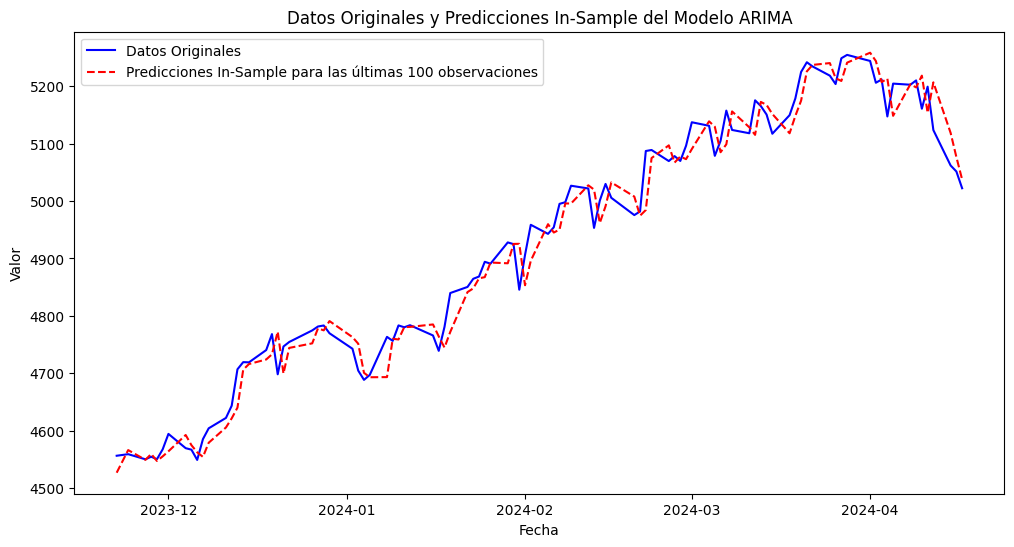

In [68]:
# Supongamos que 'model' es tu modelo ARIMA ya ajustado
n_observations = 100  # Número de observaciones finales para revisar

# Obtener el total de predicciones in-sample
in_sample_predictions = model.predict_in_sample()

# Extraer solo las últimas n_observations de las predicciones in-sample
last_n_predictions = in_sample_predictions[-n_observations:]

# Crear un índice para las últimas n_observations predicciones
last_n_index = ts.index[-n_observations:]

# Graficar la serie de tiempo completa y las predicciones in-sample para las últimas observaciones
plt.figure(figsize=(12, 6))
plt.plot(ts[-n_observations:], label='Datos Originales', color='blue')  # enfocando en las últimas observaciones
plt.plot(last_n_index, last_n_predictions, label='Predicciones In-Sample para las últimas 100 observaciones', color='red', linestyle='--')
plt.title('Datos Originales y Predicciones In-Sample del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

A simple vista se puede ver que el ajuste del modelo es realmente bueno y acorde con la muestra extraída de yahoo, sin embargo, sería pertinente hacer otros tipos de prueba antes de querer invertir dinero utilizando las predicciones del modelo.

#Conclusiones

El análisis de los residuos indica que el modelo no cumple completamente con los supuestos estadísticos necesarios para garantizar inferencias óptimas. En particular, los residuos no exhiben una distribución normal y muestran signos evidentes de heteroscedasticidad. Estas irregularidades en los residuos pueden comprometer la fiabilidad de las predicciones y las inferencias estadísticas derivadas del modelo.

La visualización de las predicciones muestra que el modelo logra un ajuste razonablemente bueno con los datos observados. No obstante, esta aparente eficacia no debe ocultar las deficiencias observadas en los residuos.

Estos resultados sugieren que, aunque el modelo proporciona una estimación aproximada de los datos, existe un margen significativo para mejorar su precisión y robustez. La ausencia de normalidad y la presencia de heteroscedasticidad en los residuos pueden ser indicativos de que el modelo no está captando adecuadamente la complejidad subyacente de la serie temporal. Esto podría atribuirse a la presencia de dinámicas no lineales en los datos, las cuales no son adecuadamente modeladas por un enfoque lineal básico como el ARIMA.